# membersデータ
- 前処理・可視化

In [1]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

comma_formatter = mpl.ticker.FuncFormatter(lambda x, _: u'{:,.0f}'.format(x))
sns.set(style='darkgrid', context='talk')
mpl.rcParams['font.family'] = 'Meiryo'
% matplotlib inline

In [2]:
data_dir = '../../data'
fig_dir = '../figure'
output_dir = '../output'

# データ読み込み

In [3]:
fname = os.path.join(data_dir, 'members.csv.gz')
df_members_raw = pd.read_csv(fname, 
                             dtype={'city': np.object_, 'registered_via': np.object_}, 
                             parse_dates=['registration_init_time'])

In [4]:
print('count: {:,}'.format(len(df_members_raw)))

count: 959,713


In [5]:
# 概要
df_members_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 959713 entries, 0 to 959712
Data columns (total 6 columns):
msno                      959713 non-null object
city                      959713 non-null object
bd                        959713 non-null int64
gender                    330195 non-null object
registered_via            959713 non-null object
registration_init_time    959713 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 43.9+ MB


In [6]:
# 先頭
df_members_raw.head()

,msno,city,bd,gender,registered_via,registration_init_time
0,++/cenboWx88n4PDN/1PBC8t9/qy/RPvozJdlRiL5a0=,1,0,NaN,9,2015-06-12
1,+++rMjxjARDHEx9zEFOpvJEDBDhT1ncn0PEnCx3llA0=,6,22,female,3,2012-08-02
2,++0t0Uy2D3r1pRVxg28G3r3l5PfhFlCPMGElwHqbYL8=,1,51,male,3,2014-09-24
3,++/ORWBI93a/9vljzuLj77ZwsyS4Qx2K/M0qjLXrxE4=,5,35,male,9,2012-04-02
4,++2bxOj+9oNH2mAemW+GwWGdzyiGPGbV/Mh210wYAZ4=,1,28,male,3,2015-08-24


## 統計量

In [7]:
# 統計量
desc_raw = df_members_raw.describe(include='all')
desc_raw

,msno,city,bd,gender,registered_via,registration_init_time
count,959713,959713,959713.000000,330195,959713,959713
unique,959713,21,NaN,2,7,4734
top,dCkbs8z74Q5M6LgNmZBwsMYyirdj5jn8vAIBUnHJ9+8=,1,NaN,male,4,2015-10-09 00:00:00
freq,1,664735,NaN,169214,440796,2169
first,NaN,NaN,NaN,NaN,NaN,2004-03-26 00:00:00
last,NaN,NaN,NaN,NaN,NaN,2017-05-19 00:00:00
mean,NaN,NaN,9.764185,NaN,NaN,NaN
std,NaN,NaN,16.740003,NaN,NaN,NaN
min,NaN,NaN,-951.000000,NaN,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,NaN


In [8]:
# 欠損値
df_members_raw.isnull().any()

msno                      False
city                      False
bd                        False
gender                     True
registered_via            False
registration_init_time    False
dtype: bool

- bdがマイナスなのはおかしい（最大値も大きすぎ）
- genderは欠損値あり

In [9]:
# 一意なmsnoであることを確認
assert df_members_raw.msno.nunique() == len(df_members_raw)

# 集計・可視化

## city

In [10]:
# 分布
city_dist = df_members_raw.city.value_counts(normalize=1)
city_dist

1     0.692639
5     0.060389
13    0.052088
4     0.038229
22    0.032776
15    0.029728
6     0.020864
14    0.014092
12    0.010135
9     0.007651
11    0.007341
8     0.006896
18    0.005839
10    0.005073
21    0.004671
3     0.004234
17    0.004162
7     0.001650
16    0.000760
20    0.000631
19    0.000151
Name: city, dtype: float64

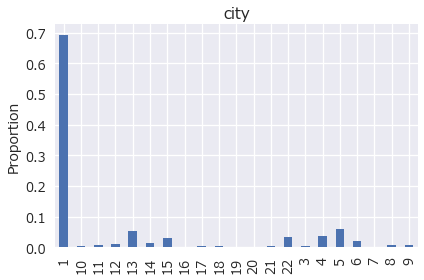

In [11]:
# 可視化
city_dist.sort_index().plot.bar()
plt.title('city')
plt.ylabel('Proportion')
plt.tight_layout()
plt.savefig(os.path.join(fig_dir, 'barplot_city.png'), dpi=200)
# - `city=1` が7割を占める
# - `city=2` は欠損

## bd

In [12]:
# 分布
df_members_raw.bd.value_counts(normalize=1).head() # 一部データ

# - `bd=0` が約7割を占める

0     0.669120
20    0.016725
21    0.016541
22    0.016448
23    0.015018
Name: bd, dtype: float64

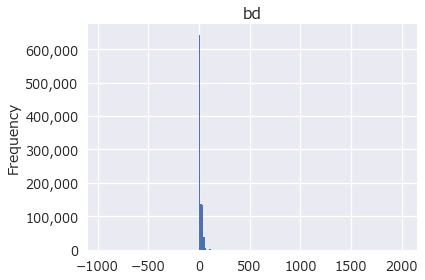

In [13]:
# ヒストグラム
ax = df_members_raw.bd.hist(bins=200)
ax.set_title('bd')
ax.set_ylabel('Frequency')
ax.set_yticks
ax.yaxis.set_major_formatter(comma_formatter)
plt.tight_layout()
plt.savefig(os.path.join(fig_dir, 'hist_bd.png'), dpi=200)
# - 負も含むデータ

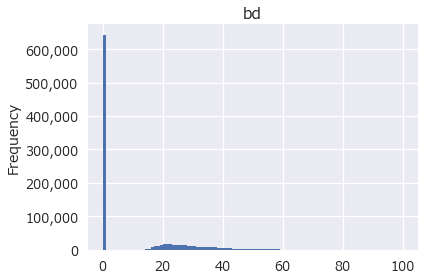

In [14]:
# bd（0以上に絞る）
ax = df_members_raw[df_members_raw.bd >= 0].bd.hist(bins=100, range=(0, 100))
ax.set_title('bd')
ax.set_ylabel('Frequency')
ax.yaxis.set_major_formatter(comma_formatter)
plt.tight_layout()
plt.savefig(os.path.join(fig_dir, 'hist_bd_over0.png'), dpi=200)
plt.show()

 - 0歳の人がやたら多い

In [15]:
# 欠損値の有無
df_members_raw.bd.isnull().any()

False

- 記入なしの人が0歳になっていると考えられそう
    - => 欠損値として処理する

## gender

In [16]:
gender_dist = df_members_raw.gender.value_counts(dropna=0, normalize=1)
gender_dist
# - 欠損が65%
# - 男女比は半々

NaN       0.655944
male      0.176317
female    0.167739
Name: gender, dtype: float64

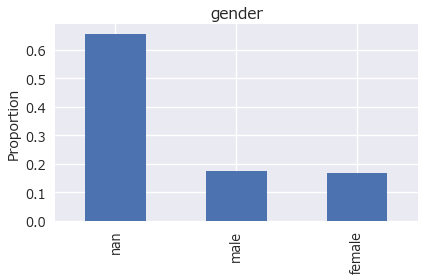

In [17]:
gender_dist.plot.bar()
plt.title('gender')
plt.ylabel('Proportion')
plt.tight_layout()
plt.savefig(os.path.join(fig_dir, 'barplot_gender.png'), dpi=200)
# - 男性が18%、女性が17%
# - 欠損が65&

## registered_via

In [18]:
registered_via_dist = df_members_raw.registered_via.value_counts(normalize=1)
registered_via_dist

4     0.459300
9     0.207773
3     0.198721
7     0.133320
13    0.000845
16    0.000040
10    0.000002
Name: registered_via, dtype: float64

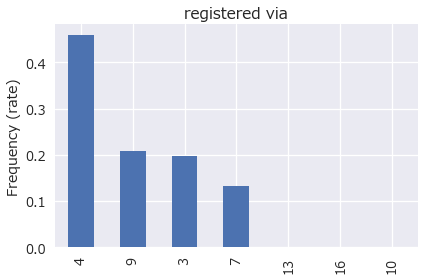

In [19]:
registered_via_dist.plot.bar()
plt.title('registered via')
plt.ylabel('Frequency (rate)')
plt.tight_layout()
plt.savefig(os.path.join(fig_dir, 'barplot_registered_via.png'), dpi=200)
# - `registered_via=4` が45%程度
# - `registered_via in (4, 9, 3, 7)` で99%以上を占める
# - （コードの意味する内容は不明）

## registration_init_time

In [20]:
# regisration min/max
df_members_raw.registration_init_time.min(), df_members_raw.registration_init_time.max()
# - 古くからデータあり

(Timestamp('2004-03-26 00:00:00'), Timestamp('2017-05-19 00:00:00'))

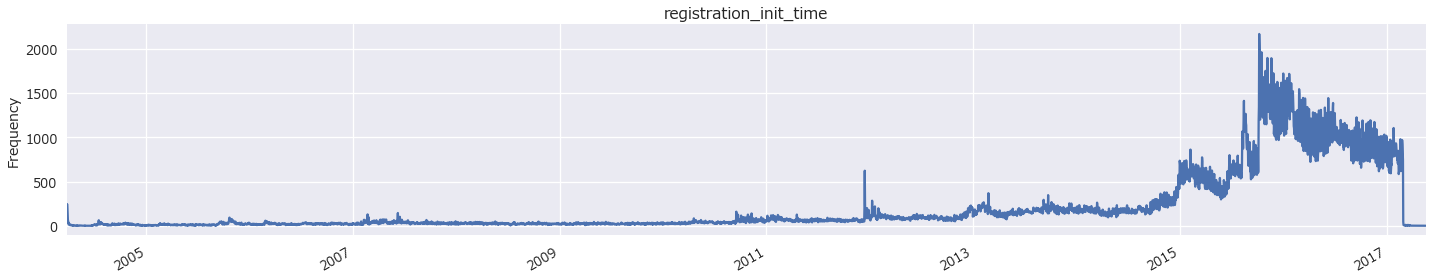

In [21]:
# 登録時期の推移
df_members_raw.registration_init_time.value_counts().plot(figsize=(20, 4))
plt.title('registration_init_time')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig(os.path.join(fig_dir, 'line_registration_init_time.png'), dpi=200)

# 前処理
- 方針：
    - `bd <= 0` は欠損値扱いとする
    - `bd > 0` について、分位点を規準に欠損値扱いとする

In [22]:
# 前処理用データ作成
df_members = df_members_raw.copy()

In [23]:
# bd <= 0の場合はnullで埋める
df_members.loc[df_members.bd <= 0, 'bd'] = np.nan

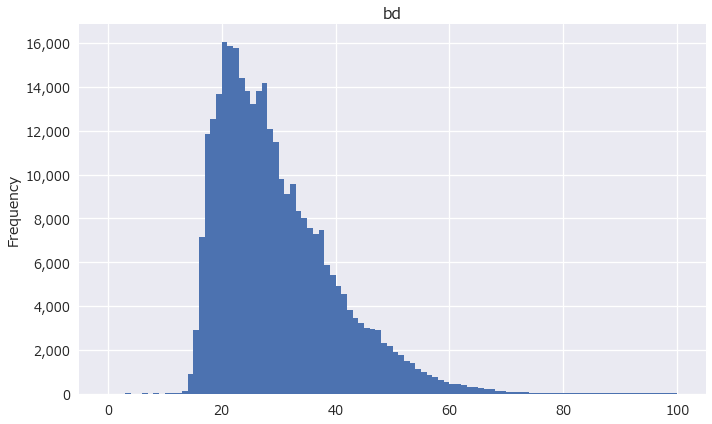

In [24]:
# 改めてヒストグラム（0~100の範囲に絞る）
ax = df_members.bd.hist(bins=100, range=(0, 100), figsize=(10, 6))
ax.set_title('bd')
ax.set_ylabel('Frequency')
ax.yaxis.set_major_formatter(comma_formatter)
plt.tight_layout()
plt.savefig(os.path.join(fig_dir, 'hist_bd_cleaned.png'), dpi=200)

In [25]:
# 分位点
qr_01 = df_members.bd.quantile(0.01)
qr_10 = df_members.bd.quantile(0.1)
qr_90 = df_members.bd.quantile(0.9)
qr_99 = df_members.bd.quantile(0.99)

qr_001 = df_members.bd.quantile(0.001)
qr_002 = df_members.bd.quantile(0.002)
qr_003 = df_members.bd.quantile(0.003)
qr_997 = df_members.bd.quantile(0.997)
qr_998 = df_members.bd.quantile(0.998)
qr_999 = df_members.bd.quantile(0.999)

In [26]:
qr_01, qr_10, qr_90, qr_99

(15.0, 18.0, 44.0, 63.0)

In [27]:
qr_001, qr_002, qr_003, qr_997, qr_998, qr_999

(14.0, 14.0, 14.0, 92.0, 102.0, 111.0)

- 分位点以下・以上をnanで埋める

In [28]:
# bd上位・下位0.2%をnull埋め
index = (df_members.bd > qr_997) | (df_members.bd < qr_003)
df_members.loc[index, 'bd'] = np.nan

In [29]:
df_members.head()

,msno,city,bd,gender,registered_via,registration_init_time
0,++/cenboWx88n4PDN/1PBC8t9/qy/RPvozJdlRiL5a0=,1,NaN,NaN,9,2015-06-12
1,+++rMjxjARDHEx9zEFOpvJEDBDhT1ncn0PEnCx3llA0=,6,22.0,female,3,2012-08-02
2,++0t0Uy2D3r1pRVxg28G3r3l5PfhFlCPMGElwHqbYL8=,1,51.0,male,3,2014-09-24
3,++/ORWBI93a/9vljzuLj77ZwsyS4Qx2K/M0qjLXrxE4=,5,35.0,male,9,2012-04-02
4,++2bxOj+9oNH2mAemW+GwWGdzyiGPGbV/Mh210wYAZ4=,1,28.0,male,3,2015-08-24


In [30]:
# クリーニング後の統計量
desc_preprocessed = df_members.describe(include='all')
desc_preprocessed

,msno,city,bd,gender,registered_via,registration_init_time
count,959713,959713,316331.000000,330195,959713,959713
unique,959713,21,NaN,2,7,4734
top,dCkbs8z74Q5M6LgNmZBwsMYyirdj5jn8vAIBUnHJ9+8=,1,NaN,male,4,2015-10-09 00:00:00
freq,1,664735,NaN,169214,440796,2169
first,NaN,NaN,NaN,NaN,NaN,2004-03-26 00:00:00
last,NaN,NaN,NaN,NaN,NaN,2017-05-19 00:00:00
mean,NaN,NaN,29.192412,NaN,NaN,NaN
std,NaN,NaN,10.225107,NaN,NaN,NaN
min,NaN,NaN,14.000000,NaN,NaN,NaN
25%,NaN,NaN,21.000000,NaN,NaN,NaN


# 書き出し

In [31]:
# 書き出し
fname = os.path.join(data_dir, 'df_members_preprocessed.csv.gz')
fname_desc = os.path.join(output_dir, 'df_members_raw_describe.csv')
fname_desc_2 = os.path.join(output_dir, 'df_members_preprocessed_describe.csv')

# 前処理データ
df_members.to_csv(fname, index=False, compression='gzip')

# 統計量
desc_raw.to_csv(fname_desc)
desc_preprocessed.to_csv(fname_desc_2)